# Task 2 - Unemployment analysis in Python 

### Import all neccesary Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Load the Dataset

In [3]:
df1 = pd.read_csv("Unemployment in India.csv")
df1

,Region,Date,Frequency,Estimated Unemployment Rate (%),Estimated Employed,Estimated Labour Participation Rate (%),Area
0,Andhra Pradesh,31-05-2019,Monthly,3.65,11999139.0,43.24,Rural
1,Andhra Pradesh,30-06-2019,Monthly,3.05,11755881.0,42.05,Rural
2,Andhra Pradesh,31-07-2019,Monthly,3.75,12086707.0,43.50,Rural
3,Andhra Pradesh,31-08-2019,Monthly,3.32,12285693.0,43.97,Rural
4,Andhra Pradesh,30-09-2019,Monthly,5.17,12256762.0,44.68,Rural
...,...,...,...,...,...,...,...
763,NaN,NaN,NaN,NaN,NaN,NaN,NaN
764,NaN,NaN,NaN,NaN,NaN,NaN,NaN
765,NaN,NaN,NaN,NaN,NaN,NaN,NaN
766,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Preprocessing and Analysing the Dataset

In [4]:
#drop the null values
df1.dropna(inplace=True)

In [5]:
df1['Date'] = pd.to_datetime(df1[" Date"])

In [6]:
df1.columns

Index(['Region', ' Date', ' Frequency', ' Estimated Unemployment Rate (%)',
       ' Estimated Employed', ' Estimated Labour Participation Rate (%)',
       'Area', 'Date'],
      dtype='object')

In [7]:
df1.rename({f'{df1.columns[2]}':'Frequency',f'{df1.columns[3]}': 'UnEmpRate',f'{df1.columns[4]}': 'Employed',f'{df1.columns[5]}': 'LabourPartRate',}, axis=1, inplace=True)
df1.drop(df1.columns[1],axis=1, inplace=True)
df1.head(5)

,Region,Frequency,UnEmpRate,Employed,LabourPartRate,Area,Date
0,Andhra Pradesh,Monthly,3.65,11999139.0,43.24,Rural,2019-05-31
1,Andhra Pradesh,Monthly,3.05,11755881.0,42.05,Rural,2019-06-30
2,Andhra Pradesh,Monthly,3.75,12086707.0,43.50,Rural,2019-07-31
3,Andhra Pradesh,Monthly,3.32,12285693.0,43.97,Rural,2019-08-31
4,Andhra Pradesh,Monthly,5.17,12256762.0,44.68,Rural,2019-09-30


In [8]:
#Replace " Monthly" with "Monthly" 
df1 = df1.replace(to_replace=" Monthly", value="Monthly")
df1['Frequency'].value_counts()

Monthly    740
Name: Frequency, dtype: int64

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 740 entries, 0 to 753
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Region          740 non-null    object        
 1   Frequency       740 non-null    object        
 2   UnEmpRate       740 non-null    float64       
 3   Employed        740 non-null    float64       
 4   LabourPartRate  740 non-null    float64       
 5   Area            740 non-null    object        
 6   Date            740 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.2+ KB


In [10]:
df1.describe()

,UnEmpRate,Employed,LabourPartRate
count,740.000000,7.400000e+02,740.000000
mean,11.787946,7.204460e+06,42.630122
std,10.721298,8.087988e+06,8.111094
min,0.000000,4.942000e+04,13.330000
25%,4.657500,1.190404e+06,38.062500
50%,8.350000,4.744178e+06,41.160000
75%,15.887500,1.127549e+07,45.505000
max,76.740000,4.577751e+07,72.570000


In [11]:
df1['Region'].unique()

array(['Andhra Pradesh', 'Assam', 'Bihar', 'Chhattisgarh', 'Delhi', 'Goa',
       'Gujarat', 'Haryana', 'Himachal Pradesh', 'Jammu & Kashmir',
       'Jharkhand', 'Karnataka', 'Kerala', 'Madhya Pradesh',
       'Maharashtra', 'Meghalaya', 'Odisha', 'Puducherry', 'Punjab',
       'Rajasthan', 'Sikkim', 'Tamil Nadu', 'Telangana', 'Tripura',
       'Uttar Pradesh', 'Uttarakhand', 'West Bengal', 'Chandigarh'],
      dtype=object)

In [12]:
North = ['Uttar Pradesh', 'Himachal Pradesh','Punjab', 'Jammu & Kashmir', 'Haryana', 'Delhi', 'Uttarakhand', 'Sikkim', 'Chandigarh']
South = ['Andhra Pradesh', 'Tamil Nadu', 'Kerala', 'Goa', 'Telangana', 'Puducherry']
East = ['Tripura', 'Assam', 'Bihar', 'Jharkhand','Meghalaya','Odisha', 'West Bengal']
West = ['Gujarat','Madhya Pradesh', 'Maharastra', 'Rajasthan']

In [13]:
North_India = df1.loc[df1.Region.apply(lambda x: x in North)]
South_India = df1.loc[df1.Region.apply(lambda x: x in South)]
East_India = df1.loc[df1.Region.apply(lambda x: x in East)]
West_India = df1.loc[df1.Region.apply(lambda x: x in West)]


In [30]:
def plotRegionArea(data, atr, title):
     
    plt.figure(figsize=(25,5))

    sns.barplot(x='Region', y=atr, hue='Area', data=data)

    plt.xticks(rotation=45)

    plt.title(title)

    plt.show()



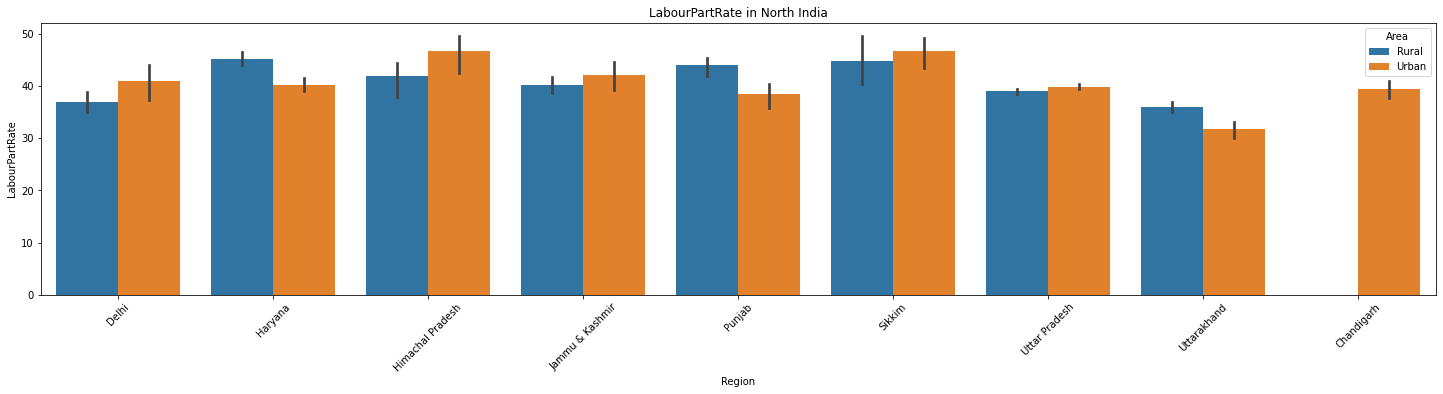

In [36]:
plotRegionArea(North_India, 'LabourPartRate', 'LabourPartRate in North India')

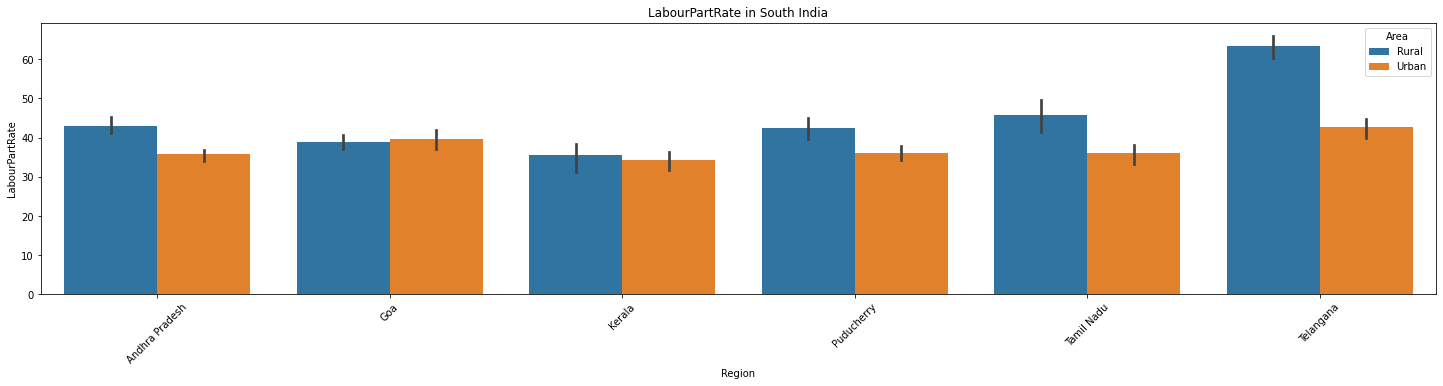

In [33]:
plotRegionArea(South_India, 'LabourPartRate','LabourPartRate in South India')

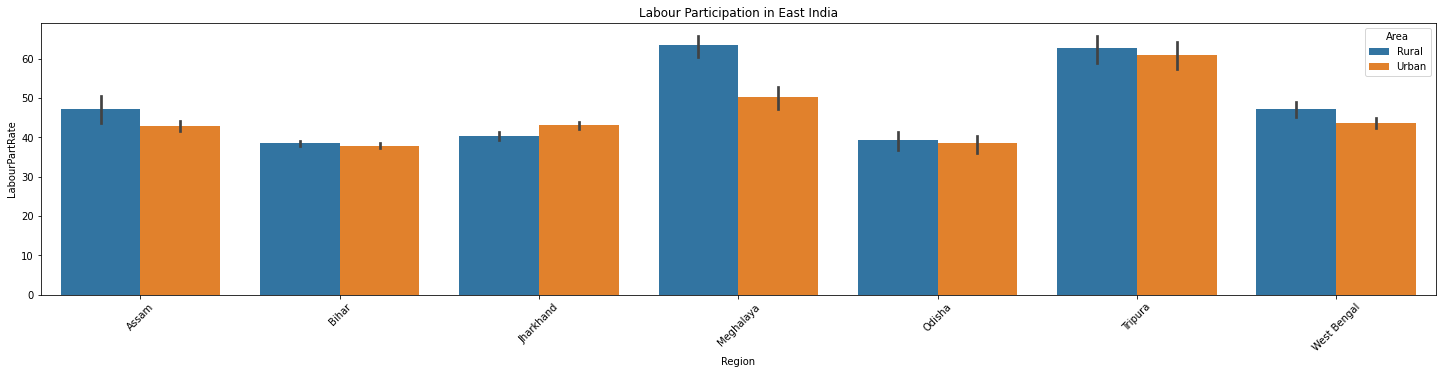

In [34]:
plotRegionArea(East_India,'LabourPartRate', 'Labour Participation in East India')

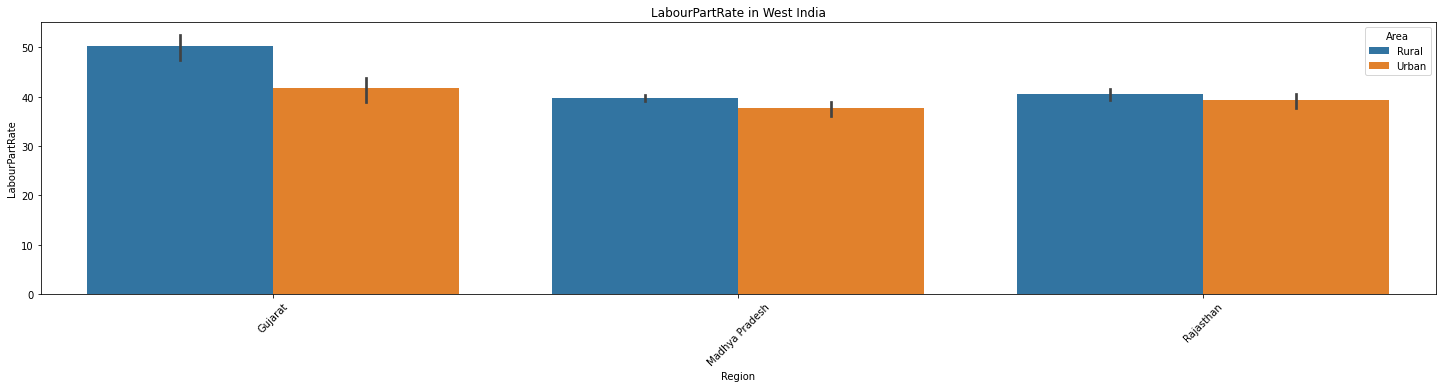

In [35]:
plotRegionArea(West_India, 'LabourPartRate', 'LabourPartRate in West India')

In [22]:
def giveAttributes(atr):

    medofdirection = []
    medofdirection.append(North_India[atr].quantile(.5))
    medofdirection.append(South_India[atr].quantile(.5))
    medofdirection.append(East_India[atr].quantile(.5))
    medofdirection.append(West_India[atr].quantile(.5))   

    return medofdirection

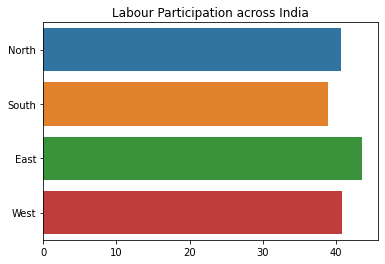

In [24]:
sns.barplot(x=giveAttributes('LabourPartRate'), y=['North', 'South', 'East', 'West'], orient='h')
plt.title("Labour Participation across India")
plt.show()

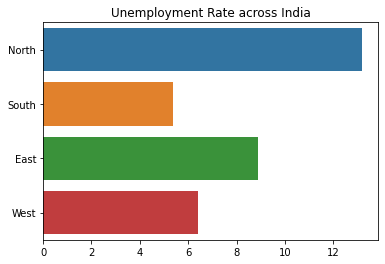

In [28]:
sns.barplot(x=giveAttributes('UnEmpRate'), y=['North', 'South', 'East', 'West'], orient='h')
plt.title("Unemployment Rate across India")
plt.show()

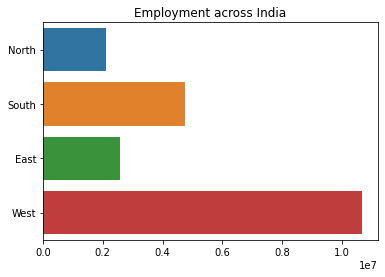

In [27]:
sns.barplot(x=giveAttributes('Employed'), y=['North', 'South', 'East', 'West'], orient='h')
plt.title("Employment across India")
plt.show()